# Write and load images

Writing, loading and displaying images are necessary components of the scientific python toolbox for microscopy. In this notebook, we just present some aspects of jupyter notebooks, before playing around with images. 

This notebook is a simple introduction and is not mandatory for the rest of the course.

## 0 - The first cell

Click on the first cell with code and press `shift+enter` to run a single cell. You have more options and shortcuts in the `Edit` and `Cell` menus.

In [4]:
def decode(s):
    '''
    Decode hexadecimal messages.
    '''
    return bytes.fromhex(s)

In [5]:
message = "4C 65 74 27 73 20 73 74 61 72 74 21"

print(decode(message))

b"Let's start!"


## 1 - Creating an image with numpy

In this first real python exercise, we are going to create a numpy array representing a 3D stack and learn how to show it in the jupyter notebook. Run the first cell to add the function definition to the current session.

In [26]:
import numpy as np

# This unecessarily complicated, you don't have to understand the function to continue
def get_3D_gaussian(size_xy, delta_z, a0=255, std_xy=20., std_z=3.):    
    '''
    Returns a 2D Gaussian whose standard deviation and amplitude depend on the 
    distance to the central plane z=0.

            Parameters:
                    size_xy (int): Size of the slice in X and Y directions
                    delta_z (int): Distance of the slice to the center (positive 
                                   or negative)
                    a0 (int): Maximum amplitude of the Gaussian. 
                    std_xy (float): Standard deviation in pixels of the Gaussian 
                                    in the X and Y directions.
                    std_z (float): Standard deviation in pixels of the Gaussian 
                                   amplitude in the Z direction.

            Returns:
                    XY slice
    '''
    # create a meshgrid
    x, y = np.meshgrid(np.linspace(0, size_xy, size_xy), np.linspace(0, size_xy, size_xy))
    
    # distance to the center of the grid
    delta_x = x - size_xy / 2
    delta_y = y - size_xy / 2
    d_xy = np.sqrt(delta_x*delta_x+delta_y*delta_y)
    
    # effective standard deviation (small at z=0, larger with distance to the center plane)
    std_xy_eff = std_xy * ( abs(delta_z) + 0.5)
    
    # compute Gaussian in XY
    xy_gauss = np.exp(-( d_xy**2 / (2.0 * std_xy_eff**2 ) ) )
    
    # compute a z-dependent amplitude term
    amplitude = a0 * np.exp(-( delta_z**2 / (2.0 * std_z**2 ) ) )
    
    
    return xy_gauss * amplitude

Let's now call this function to get a single slice:

In [ ]:
#######################################################
##### exercise: call the get_3D_gaussian function #####



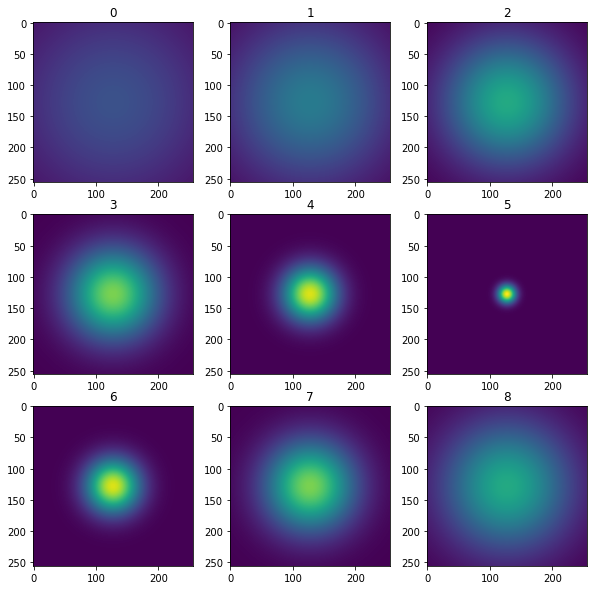

In [31]:
import matplotlib.pyplot as plt


imgs = [get_3D_gaussian(256, z) for z in range(-5, 5)]



fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    if i < len(imgs):
        # show the image with a maximum and minimum value in order to have 
        # comparable contrast between the images
        ax.imshow(imgs[i], vmin=0, vmax=255)
        ax.set_title(str(titles[i]))
    else:
        # in case the number of suplots is larger than the number of elements 
        # in imgs
        ax.remove()
plt.show()


## 2 - Saving a numpy array

## 3 - Loading tifs

## 4 - 